In [217]:
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

from dipy.reconst.ivim import IvimModel, _ivim_error, ivim_function
from dipy.data.fetcher import read_ivim

% matplotlib inline

In [136]:
img, gtab = read_ivim()
data = img.get_data()

Dataset is already in place. If you want to fetch it again please first remove the folder /root/.dipy/ivim 


In [322]:
idx = dict({"S0":0, "f":1, "D*":2, "D":3})

In [393]:
def simulate(data, xlim, ylim, z):
    
    x1, x2 = xlim
    y1, y2 = ylim
    new_data = data[x1:x2, y1:y2, z-1:z+1, :]
    
    print ("Fitting model for the limits {}, {}, z".format(xlim, ylim, z))
    
    model = IvimModel(gtab)
    fit = model.fit(new_data)
    
    print ("Plotting the results for a few voxels")
    for i in range(0, 2):
        for j in range(3, 5):
            for k in range(0, 2):
                voxel = new_data[i, j , k, : ]
                voxel_params = fit.model_params[i, j , k,: ]
                print ("Plot for the voxels at {}, {}, {}".format(i+85 , j+190, k+8 ))
                plot_signals(gtab.bvals, voxel, ivim_function(voxel_params, gtab.bvals), voxel_params)
    
    params = fit.model_params
    axial_middle = int(params.shape[2] / 2)

    print ("Plotting slices at z = {}".format(z +1))
    plot_map(new_data[:, :, 1, 0], "S values at b=0", (0, 10000))
    plot_map(params[:, :, 1, 0], "S0", (0, 10000))
    plot_map(params[:, :, 1, 1], "f", (0, 1))
    plot_map(params[:, :, 1, 2], "D*", (0,10))
    plot_map(params[:, :, 1, 3], "D", (0,0.01))

    return fit
    
def plot_map(raw_data, variable, limits):
    lower, upper = limits
    plt.title('Showing the {}'.format(variable))
    plt.imshow(raw_data.T, origin='lower', clim=(lower, upper))
    plt.colorbar()
    plt.show()
    
def plot_signals(bvals, data, estimated_signal, est_params):
    """Plots """
    
    plt.scatter(bvals, estimated_signal, color = "red", label="Estimated signal")
    plt.scatter(bvals, data, color = "blue", label="Actual signal")
    plt.xlabel("bvalues")
    plt.ylabel("Signals")
    
    S0_est, f_est, D_star_est, D_est = est_params

    text_fit = 'Estimated \n S0={:06.3f} f={:06.4f}\nD*={:06.5f} D={:06.5f}'.format(S0_est, 
                                                                                    f_est, 
                                                                                    D_star_est, 
                                                                                    D_est)
    plt.text(0.65, 0.50, text_fit, horizontalalignment='center',
             verticalalignment='center', transform=plt.gca().transAxes)
    
    plt.legend(loc='upper left')
    
    plt.show()

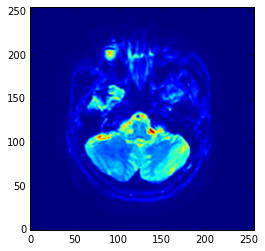

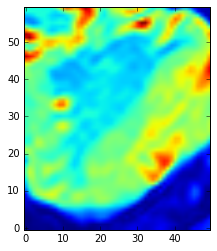

In [401]:
plt.imshow(data[:, :, 10, 0].T, origin='lower')
plt.show()

xlim = (125,175)
ylim = (50, 110)
z = 10

x1, x2 = xlim
y1, y2 = ylim

plt.imshow(data[x1:x2, y1:y2, z, 0].T, origin='lower')
plt.show()

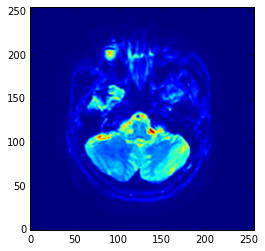

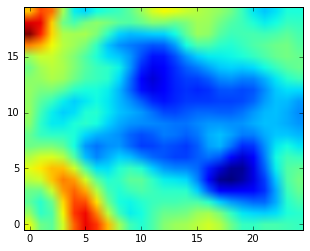

In [398]:
plt.imshow(data[:, :, 10, 0].T, origin='lower')
plt.show()

xlim = (75,100)
ylim = (80, 100)
z = 10

x1, x2 = xlim
y1, y2 = ylim

plt.imshow(data[x1:x2, y1:y2, z, 0].T, origin='lower')
plt.show()

/root/dev/gsoc16/dipy/dipy/reconst/ivim.py:26: RuntimeWarning: overflow encountered in exp
  S = S0 * (f * np.exp(-bvals * D_star) + (1 - f) * np.exp(-bvals * D))
/root/dev/gsoc16/dipy/dipy/reconst/ivim.py:33: RuntimeWarning: overflow encountered in square
  return (signal - ivim_function(params, bvals))**2
/root/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:421: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/root/dev/gsoc16/dipy/dipy/reconst/ivim.py:26: RuntimeWarning: overflow encountered in multiply
  S = S0 * (f * np.exp(-bvals * D_star) + (1 - f) * np.exp(-bvals * D))


Fitting model for the limits (75, 100), (80, 100), z
Plotting the results for a few voxels
Plot for the voxels at 85, 193, 8


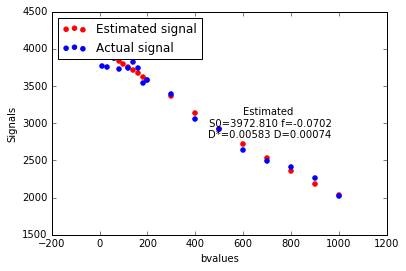

Plot for the voxels at 85, 193, 9


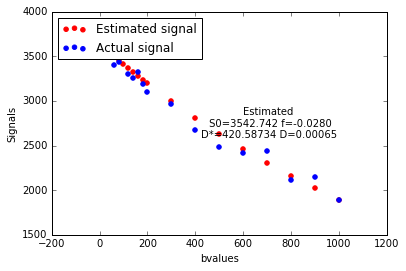

Plot for the voxels at 85, 194, 8


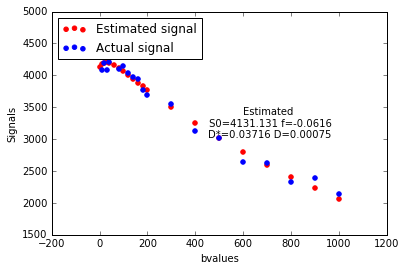

Plot for the voxels at 85, 194, 9


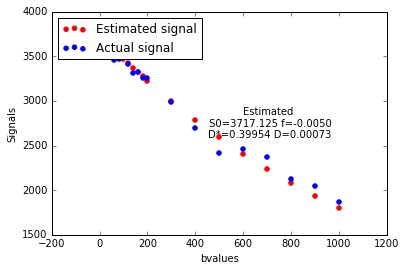

Plot for the voxels at 86, 193, 8


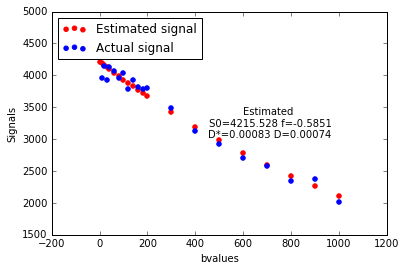

Plot for the voxels at 86, 193, 9


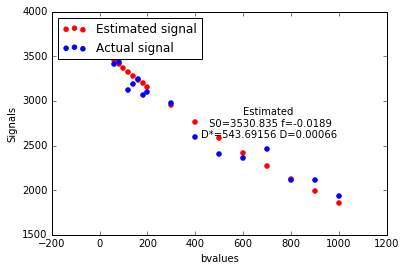

Plot for the voxels at 86, 194, 8


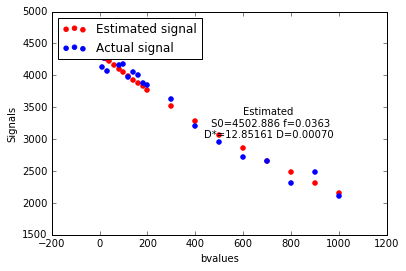

Plot for the voxels at 86, 194, 9


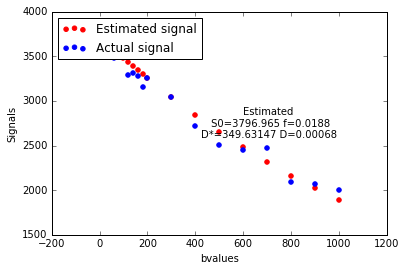

Plotting slices at z = 11


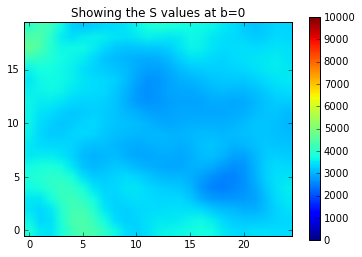

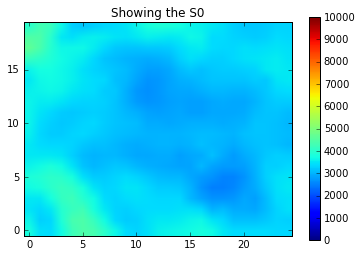

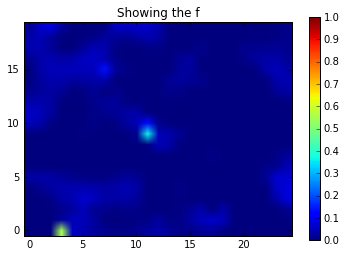

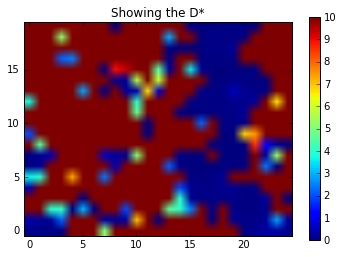

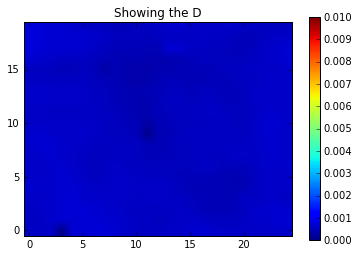

In [399]:
simulate(data, xlim, ylim, z)